In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

## Greedy Best-First Search

`Greedy Best-First Search is a heuristic-driven algorithm that prioritizes the exploration of nodes based on their estimated cost to the goal. The algorithm selects the node that appears most promising according to a heuristic function h(n), which estimates the cost from node n to the goal.`

__[Reference](https://www.geeksforgeeks.org/informed-search-algorithms-in-artificial-intelligence/?ref=next_article)__

`Greedy Best-First Search is an AI search algorithm that attempts to find the most promising path from a given starting point to a goal. It prioritizes paths that appear to be the most promising, regardless of whether or not they are actually the shortest path. The algorithm works by evaluating the cost of each possible path and then expanding the path with the lowest cost. This process is repeated until the goal is reached.`

__[Reference](https://www.geeksforgeeks.org/greedy-best-first-search-algorithm/)__

In [5]:
def heuristic(a, b):
    """Calculate the Manhattan distance from a to b"""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def greedy_best_first_search(maze, start, end):
    """Perform Greedy Best-First Search in a grid maze"""
    open_list = []
    came_from = {}  # Tracks path history
    visited = set()  # Keeps track of visited nodes to prevent revisiting
    
    heapq.heappush(open_list, (heuristic(start, end), start))
    came_from[start] = None  # Start has no parent
    
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
    
    while open_list:
        current_heuristic, current = heapq.heappop(open_list)
        
        if current == end:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            return path[::-1]
        
        visited.add(current)
        
        # Explore neighbors
        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])
            
            # Ensure the neighbor is within the bounds of the maze
            if (0 <= neighbor[0] < len(maze)) and (0 <= neighbor[1] < len(maze[0])):
                if maze[neighbor[0]][neighbor[1]] == 0 and neighbor not in visited:
                    visited.add(neighbor)
                    came_from[neighbor] = current
                    heapq.heappush(open_list, (heuristic(neighbor, end), neighbor))
    
    return None  # If no path is found

def visualize_path(maze, path):
    """Modify the maze to include the path and visualize it."""
    visual_maze = [row[:] for row in maze]  # Create a copy of the maze to modify
    for position in path:
        visual_maze[position[0]][position[1]] = '*'
    
    # Mark the start and end positions
    start, end = path[0], path[-1]
    visual_maze[start[0]][start[1]] = 'S'
    visual_maze[end[0]][end[1]] = 'E'
    
    # Replace numeric values for visual clarity
    for row in range(len(visual_maze)):
        for col in range(len(visual_maze[row])):
            if visual_maze[row][col] == 1:
                visual_maze[row][col] = '#'
            elif visual_maze[row][col] == 0:
                visual_maze[row][col] = ' '
    
    # Print the visual maze
    for row in visual_maze:
        print(' '.join(row))


# Example maze: 0 - walkable, 1 - blocked
maze = [
    [0, 0, 0, 0, 1],
    [0, 1, 1, 0, 1],
    [0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0]
]
start = (0, 0)
end = (4, 4)

path = greedy_best_first_search(maze, start, end)
print("Path from start to end:", path)

# Modify and visualize the path on the maze
visualize_path(maze, path)


Path from start to end: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (2, 4), (3, 4), (4, 4)]
S * * * #
  # # * #
      * *
  #   # *
        E


## Greedy Best-First Search for Hierarchical Routing

Path from A to M: ['A', 'C', 'G', 'M']


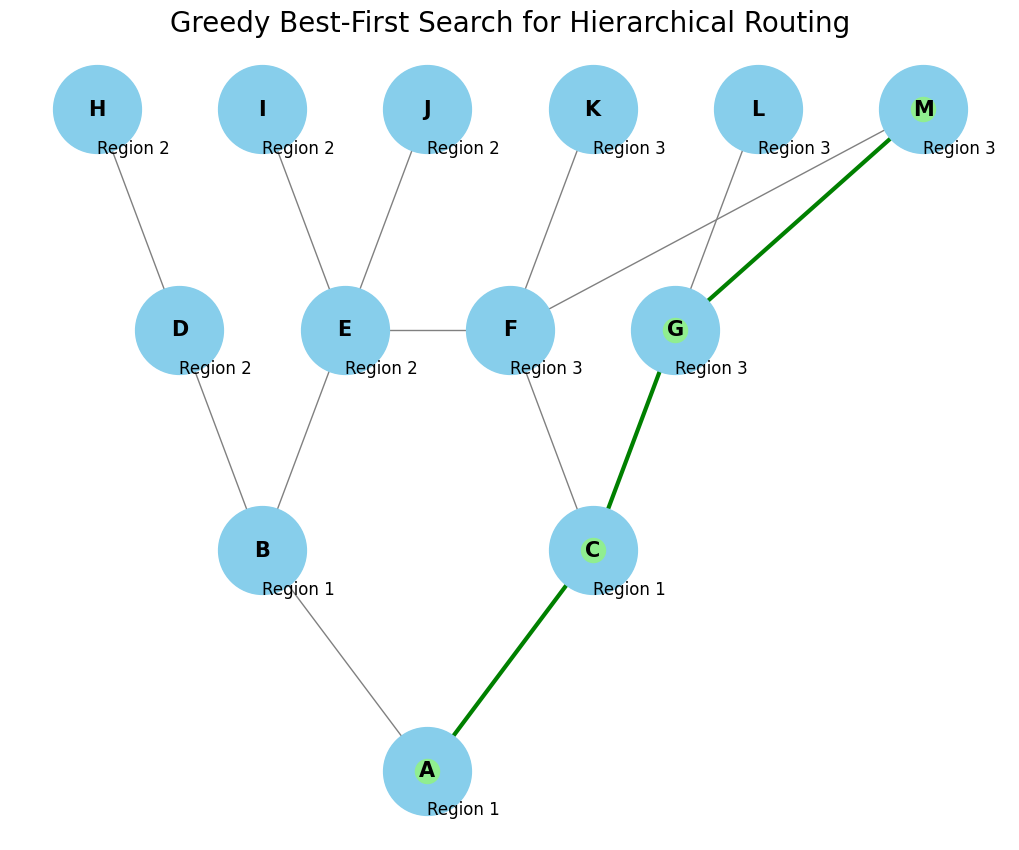

In [6]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# Node class to store information about each node
class Node:
    def __init__(self, name, heuristic):
        self.name = name
        self.heuristic = heuristic
    
    def __lt__(self, other):
        return self.heuristic < other.heuristic

# Greedy Best-First Search for Hierarchical Routing
def greedy_best_first_search_hierarchical(graph, start, goal, heuristic, region_map):
    # Priority queue to hold nodes to explore, sorted by heuristic value
    priority_queue = []
    heapq.heappush(priority_queue, Node(start, heuristic[start]))

    visited = set()  # To keep track of visited nodes

    # Path dictionary to track the explored paths
    path = {start: None}

    while priority_queue:
        current_node = heapq.heappop(priority_queue).name

        # If the goal is reached, reconstruct the path
        if current_node == goal:
            return reconstruct_path(path, start, goal)

        visited.add(current_node)

        # Explore neighbors in the same region first, then move to other regions
        current_region = region_map[current_node]
        for neighbor in graph[current_node]:
            if neighbor not in visited and region_map[neighbor] == current_region:
                heapq.heappush(priority_queue, Node(neighbor, heuristic[neighbor]))
                if neighbor not in path:
                    path[neighbor] = current_node

        # Explore neighbors in other regions after same-region neighbors
        for neighbor in graph[current_node]:
            if neighbor not in visited and region_map[neighbor] != current_region:
                heapq.heappush(priority_queue, Node(neighbor, heuristic[neighbor]))
                if neighbor not in path:
                    path[neighbor] = current_node

    return None  # If no path is found

# Helper function to reconstruct the path from start to goal
def reconstruct_path(path, start, goal):
    current = goal
    result_path = []
    while current is not None:
        result_path.append(current)
        current = path[current]
    result_path.reverse()
    return result_path

# Function to visualize the graph and the path
def visualize_graph(graph, path, pos, region_map):
    G = nx.Graph()

    # Add edges to the graph
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    # Plot the graph
    plt.figure(figsize=(10, 8))
    
    # Draw the nodes and edges
    nx.draw(G, pos, with_labels=True, node_size=4000, node_color='skyblue', font_size=15, font_weight='bold', edge_color='gray')

    # Highlight the path
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=3)
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='lightgreen')

    # Display region information on the graph
    for node, region in region_map.items():
        plt.text(pos[node][0], pos[node][1] - 0.2, f"Region {region}", fontsize=12, color='black')

    plt.title("Greedy Best-First Search for Hierarchical Routing", size=20)
    plt.show()

# Complex graph with hierarchical regions
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': ['H'],
    'E': ['I', 'J'],
    'F': ['K' , 'M' , 'E'],
    'G': ['L', 'M'],
    'H': [],
    'I': [],
    'J': [],
    'K': [],
    'L': [],
    'M': []
}

# Heuristic values (assumed for this example)
heuristic = {
    'A': 8,
    'B': 6,
    'C': 7,
    'D': 5,
    'E': 4,
    'F': 5,
    'G': 4,
    'H': 3,
    'I': 2,
    'J': 1,
    'K': 3,
    'L': 2,
    'M': 1
}

# Define regions for the hierarchical routing (nodes belonging to different regions)
region_map = {
    'A': 1, 'B': 1, 'C': 1,
    'D': 2, 'E': 2,
    'F': 3, 'G': 3,
    'H': 2, 'I': 2, 'J': 2,
    'K': 3, 'L': 3, 'M': 3
}

# Define positions for better visualization layout (can be modified)
pos = {
    'A': (0, 0),
    'B': (-1, 1),
    'C': (1, 1),
    'D': (-1.5, 2),
    'E': (-0.5, 2),
    'F': (0.5, 2),
    'G': (1.5, 2),
    'H': (-2, 3),
    'I': (-1, 3),
    'J': (0, 3),
    'K': (1, 3),
    'L': (2, 3),
    'M': (3, 3)
}

# Perform Greedy Best-First Search for hierarchical routing
start_node = 'A'
goal_node = 'M'
result_path = greedy_best_first_search_hierarchical(graph, start_node, goal_node, heuristic, region_map)

print("Path from {} to {}: {}".format(start_node, goal_node, result_path))

# Visualize the graph and the found path
visualize_graph(graph, result_path, pos, region_map)


## A Search*

`A* Search is one of the most widely used informed search algorithms. It combines the strengths of both uniform-cost search and Greedy Best-First Search by using a composite cost function f(n)=g(n)+h(n), where:`
`g(n) is the exact cost from the start node to node n.`
`h(n) is the heuristic estimate of the cost from n to the goal.`

__[Reference](https://www.geeksforgeeks.org/heuristic-function-in-ai/)__

Path found: [(8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (4, 1), (4, 2), (3, 2), (2, 2), (1, 2), (1, 1), (1, 0), (0, 0)]


C:\Users\TAPAJOYTI\AppData\Local\Temp\ipykernel_35348\3162497003.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Accent', 5)


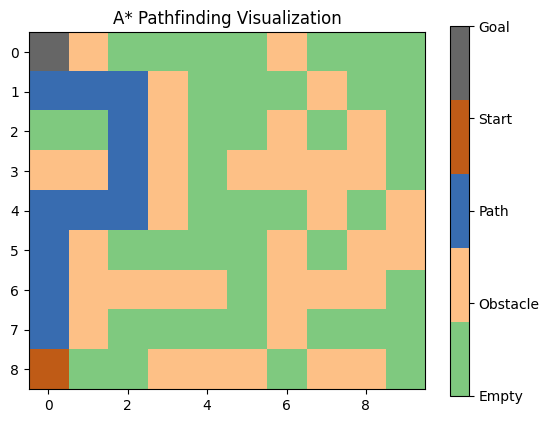

In [10]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

# Define the A* algorithm
def a_star(grid, start, goal):
    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    open_list = []
    heapq.heappush(open_list, (0, start))
    
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}
    came_from = {}
    
    while open_list:
        _, current = heapq.heappop(open_list)
        
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path
        
        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])
            
            if 0 <= neighbor[0] < len(grid) and 0 <= neighbor[1] < len(grid[0]) and grid[neighbor[0]][neighbor[1]] == 0:
                tentative_g_score = g_score[current] + 1
                
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))
    
    return None

# Visualization function with standard colors
def visualize_path(grid, path, start, goal):
    grid = np.array(grid)
    for (x, y) in path:
        grid[x, y] = 2  # Mark the path
    grid[start[0], start[1]] = 3  # Mark the start
    grid[goal[0], goal[1]] = 4  # Mark the goal
    
    # Define a custom color map
    cmap = plt.cm.get_cmap('Accent', 5)
    bounds = [0, 1, 2, 3, 4]
    norm = plt.Normalize(vmin=0, vmax=4)
    
    plt.imshow(grid, cmap=cmap, norm=norm)
    plt.colorbar(ticks=[0, 1, 2, 3, 4], format=plt.FuncFormatter(lambda val, loc: ['Empty', 'Obstacle', 'Path', 'Start', 'Goal'][int(val)]))
    plt.title("A* Pathfinding Visualization")
    plt.show()

# Example grid: 0 - walkable, 1 - obstacle
grid = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
]

grid = [
        [0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
        [1, 1, 0, 1, 0, 1, 1, 1, 1, 0],
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
        [0, 1, 0, 0, 0, 0, 1, 0, 1, 1],
        [0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 1, 1, 0]
    ]

# Define start and goal positions
#start = (0, 0)
#goal = (9, 9)

start = (8, 0)
goal = (0, 0)

# Run the A* algorithm
path = a_star(grid, start, goal)

if path:
    print("Path found:", path)
    visualize_path(grid, path, start, goal)
else:
    print("No path found")


__[Reference](https://www.geeksforgeeks.org/a-search-algorithm/)__

In [8]:
import math
import heapq

# Define the Cell class
class Cell:
    def __init__(self):
        self.parent_i = 0  # Parent cell's row index
        self.parent_j = 0  # Parent cell's column index
        self.f = float('inf')  # Total cost of the cell (g + h)
        self.g = float('inf')  # Cost from start to this cell
        self.h = 0  # Heuristic cost from this cell to destination

# Define the size of the grid
ROW = 9
COL = 10

# Check if a cell is valid (within the grid)
def is_valid(row, col):
    return (row >= 0) and (row < ROW) and (col >= 0) and (col < COL)

# Check if a cell is unblocked
def is_unblocked(grid, row, col):
    return grid[row][col] == 1

# Check if a cell is the destination
def is_destination(row, col, dest):
    return row == dest[0] and col == dest[1]

# Calculate the heuristic value of a cell (Euclidean distance to destination)
def calculate_h_value(row, col, dest):
    return ((row - dest[0]) ** 2 + (col - dest[1]) ** 2) ** 0.5

# Trace the path from source to destination
def trace_path(cell_details, dest):
    print("The Path is ")
    path = []
    row = dest[0]
    col = dest[1]

    # Trace the path from destination to source using parent cells
    while not (cell_details[row][col].parent_i == row and cell_details[row][col].parent_j == col):
        path.append((row, col))
        temp_row = cell_details[row][col].parent_i
        temp_col = cell_details[row][col].parent_j
        row = temp_row
        col = temp_col

    # Add the source cell to the path
    path.append((row, col))
    # Reverse the path to get the path from source to destination
    path.reverse()

    # Print the path
    for i in path:
        print("->", i, end=" ")
    print()

# Implement the A* search algorithm
def a_star_search(grid, src, dest):
    # Check if the source and destination are valid
    if not is_valid(src[0], src[1]) or not is_valid(dest[0], dest[1]):
        print("Source or destination is invalid")
        return

    # Check if the source and destination are unblocked
    if not is_unblocked(grid, src[0], src[1]) or not is_unblocked(grid, dest[0], dest[1]):
        print("Source or the destination is blocked")
        return

    # Check if we are already at the destination
    if is_destination(src[0], src[1], dest):
        print("We are already at the destination")
        return

    # Initialize the closed list (visited cells)
    closed_list = [[False for _ in range(COL)] for _ in range(ROW)]
    # Initialize the details of each cell
    cell_details = [[Cell() for _ in range(COL)] for _ in range(ROW)]

    # Initialize the start cell details
    i = src[0]
    j = src[1]
    cell_details[i][j].f = 0
    cell_details[i][j].g = 0
    cell_details[i][j].h = 0
    cell_details[i][j].parent_i = i
    cell_details[i][j].parent_j = j

    # Initialize the open list (cells to be visited) with the start cell
    open_list = []
    heapq.heappush(open_list, (0.0, i, j))

    # Initialize the flag for whether destination is found
    found_dest = False

    # Main loop of A* search algorithm
    while len(open_list) > 0:
        # Pop the cell with the smallest f value from the open list
        p = heapq.heappop(open_list)

        # Mark the cell as visited
        i = p[1]
        j = p[2]
        closed_list[i][j] = True

        # For each direction, check the successors
        directions = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]
        for dir in directions:
            new_i = i + dir[0]
            new_j = j + dir[1]

            # If the successor is valid, unblocked, and not visited
            if is_valid(new_i, new_j) and is_unblocked(grid, new_i, new_j) and not closed_list[new_i][new_j]:
                # If the successor is the destination
                if is_destination(new_i, new_j, dest):
                    # Set the parent of the destination cell
                    cell_details[new_i][new_j].parent_i = i
                    cell_details[new_i][new_j].parent_j = j
                    print("The destination cell is found")
                    # Trace and print the path from source to destination
                    trace_path(cell_details, dest)
                    found_dest = True
                    return
                else:
                    # Calculate the new f, g, and h values
                    g_new = cell_details[i][j].g + 1.0
                    h_new = calculate_h_value(new_i, new_j, dest)
                    f_new = g_new + h_new

                    # If the cell is not in the open list or the new f value is smaller
                    if cell_details[new_i][new_j].f == float('inf') or cell_details[new_i][new_j].f > f_new:
                        # Add the cell to the open list
                        heapq.heappush(open_list, (f_new, new_i, new_j))
                        # Update the cell details
                        cell_details[new_i][new_j].f = f_new
                        cell_details[new_i][new_j].g = g_new
                        cell_details[new_i][new_j].h = h_new
                        cell_details[new_i][new_j].parent_i = i
                        cell_details[new_i][new_j].parent_j = j

    # If the destination is not found after visiting all cells
    if not found_dest:
        print("Failed to find the destination cell")

def main():
    # Define the grid (1 for unblocked, 0 for blocked)
    grid = [
        [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
        [1, 1, 1, 0, 1, 1, 0, 1, 0, 1],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
        [1, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 0, 0, 0, 1, 0, 0, 1]
    ]

    # Define the source and destination
    src = [8, 0]
    dest = [0, 0]

    # Run the A* search algorithm
    a_star_search(grid, src, dest)

if __name__ == "__main__":
    main()


The destination cell is found
The Path is 
-> (8, 0) -> (7, 0) -> (6, 0) -> (5, 0) -> (4, 1) -> (3, 2) -> (2, 1) -> (1, 0) -> (0, 0) 


## A* Path Finding

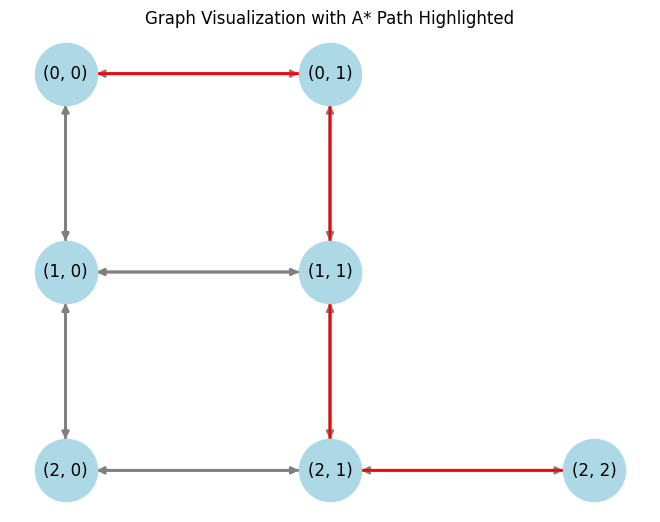

In [11]:


def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(graph, start, goal):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {node: float('inf') for node in graph}
    g_score[start] = 0
    f_score = {node: float('inf') for node in graph}
    f_score[start] = heuristic(start, goal)

    while open_set:
        _, current = heapq.heappop(open_set)
        if current == goal:
            return reconstruct_path(came_from, current)

        for neighbor, cost in graph[current].items():
            tentative_g_score = g_score[current] + cost
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None

def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.append(current)
    total_path.reverse()
    return total_path

def path_to_edges(path):
    return [(path[i], path[i + 1]) for i in range(len(path) - 1)]

# Define the graph
graph = {
    (0, 0): {(1, 0): 1, (0, 1): 1},
    (1, 0): {(0, 0): 1, (1, 1): 1, (2, 0): 1},
    (0, 1): {(0, 0): 1, (1, 1): 1},
    (1, 1): {(1, 0): 1, (0, 1): 1, (2, 1): 1},
    (2, 0): {(1, 0): 1, (2, 1): 1},
    (2, 1): {(2, 0): 1, (1, 1): 1, (2, 2): 1},
    (2, 2): {(2, 1): 1}
}

start = (0, 0)
goal = (2, 2)

# Use NetworkX to create the graph
G = nx.DiGraph()
for node, edges in graph.items():
    for dest, weight in edges.items():
        G.add_edge(node, dest, weight=weight)

# Get the path from A* algorithm
path = a_star(graph, start, goal)

# Plotting
pos = {node: (node[1], -node[0]) for node in graph}  # position nodes based on grid coordinates
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, edge_color='gray', width=2)
nx.draw_networkx_edges(G, pos, edgelist=path_to_edges(path), edge_color='red', width=2)
plt.title('Graph Visualization with A* Path Highlighteds')
plt.show()
